## Importing the Dependencies

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


## Data Collection & Analysis

In [107]:
# loading the data from excel file to a Pandas DataFrame
df = pd.read_excel("BMI_Data.xlsx")

In [108]:
# first 5 rows of the dataframe
df.head()

,Date,Weight in Pounds,BMI,Cholesterol
0,1993-07-01,201.38,85.35058,251.200000
1,1993-07-02,202.39,85.31267,254.653866
2,1993-07-03,188.84,85.13161,244.942237
3,1993-07-04,184.13,85.16573,236.066544
4,1993-07-05,192.51,85.15533,247.436015


In [109]:
# number of rows and columns
df.shape

(761, 4)

In [110]:
# getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              761 non-null    datetime64[ns]
 1   Weight in Pounds  761 non-null    float64       
 2   BMI               761 non-null    float64       
 3   Cholesterol       761 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 23.9 KB


In [111]:
# checking for missing values
df.isnull().sum()

Date                0
Weight in Pounds    0
BMI                 0
Cholesterol         0
dtype: int64

## Data Analysis

In [112]:
# statistical Measures of the dataset
df.describe()

,Weight in Pounds,BMI,Cholesterol
count,761.000000,761.000000,761.000000
mean,205.539075,86.556922,257.247678
std,17.098299,2.262907,27.467817
min,27.870000,83.716540,0.000000
25%,205.380000,84.979620,248.631520
50%,208.830000,85.875630,264.743919
75%,211.920000,87.566590,272.940000
max,218.360000,98.260000,309.478148


C:\Users\kishu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


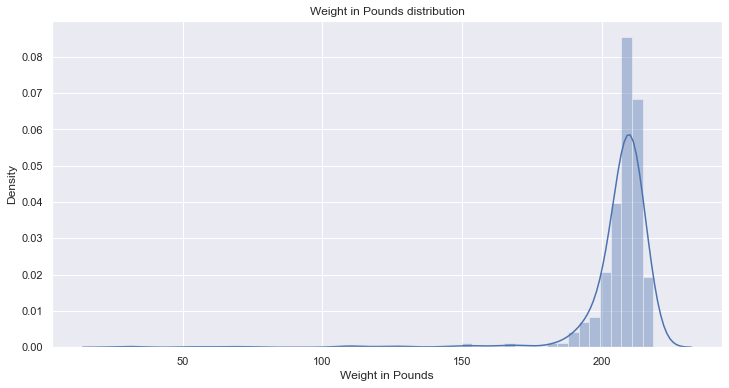

In [113]:
plt.figure(figsize=(12,6))
sns.distplot(df['Weight in Pounds'])
plt.title('Weight in Pounds distribution')
plt.show()

C:\Users\kishu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


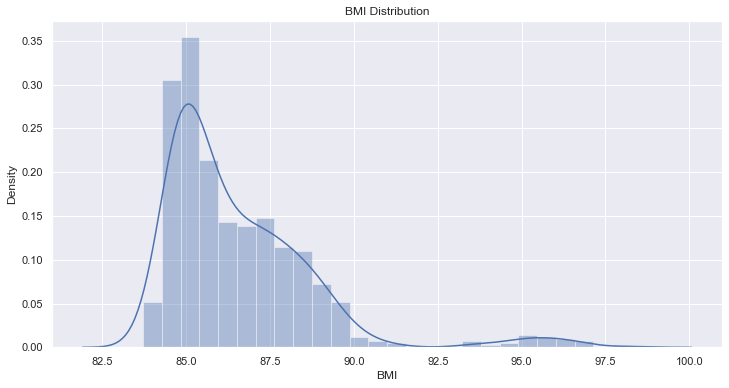

In [114]:
plt.figure(figsize=(12,6))
sns.distplot(df['BMI'])
plt.title('BMI Distribution')
plt.show()

C:\Users\kishu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


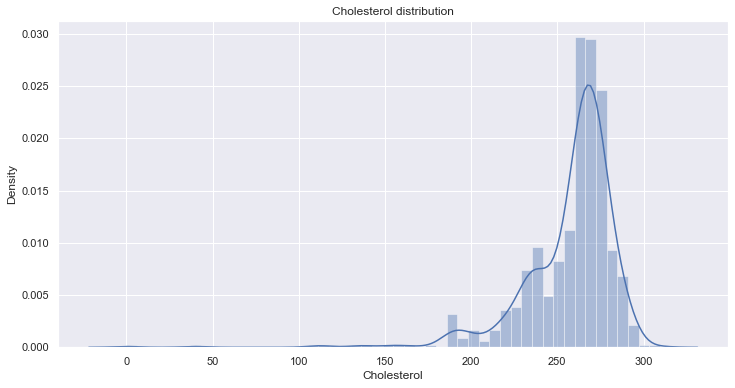

In [115]:
# distribution of Cholesterol value

plt.figure(figsize=(12,6))
sns.distplot(df['Cholesterol'])
plt.title('Cholesterol distribution')
plt.show()

## Splitting the Features and Target

In [116]:
X = df.drop(['Cholesterol','Date'],axis=1)
Y = df['Cholesterol']

In [117]:
print(X)

     Weight in Pounds       BMI
0              201.38  85.35058
1              202.39  85.31267
2              188.84  85.13161
3              184.13  85.16573
4              192.51  85.15533
..                ...       ...
756            212.23  84.72916
757            212.65  84.69604
758            214.08  84.79000
759            213.87  85.01045
760            214.55  85.24000

[761 rows x 2 columns]


In [118]:
print(Y)

0      251.200000
1      254.653866
2      244.942237
3      236.066544
4      247.436015
          ...    
756    213.445089
757    212.924841
758    216.699800
759    214.869370
760    214.183178
Name: Cholesterol, Length: 761, dtype: float64


## Data Standardization

In [119]:
scaler = StandardScaler()
scaler.fit(X)

standardized_data = scaler.transform(X)

print(standardized_data)

[[-0.24340493 -0.53344466]
 [-0.18429588 -0.55020847]
 [-0.97729359 -0.63027322]
 ...
 [ 0.49984753 -0.78133319]
 [ 0.48755753 -0.68385018]
 [ 0.52735372 -0.58234315]]


In [120]:
x = standardized_data
y = df["Cholesterol"]

## Splitting the data into Training data & Testing Data

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [122]:
print(X.shape, X_train.shape, X_test.shape)

(761, 2) (608, 2) (153, 2)


## Model Training

In [123]:
# loading the Linear Regression model
regressor = LinearRegression()

In [124]:
regressor.fit(X_train, Y_train)

LinearRegression()

## Model Evaluation

In [125]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [126]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.29310975837433473


In [127]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [128]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.4092554759759862


## Building a Predictive System

In [147]:
input_data = (200.97,85.15289)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The Cholesterol is ', prediction[0])

[252.93373491]
The Cholesterol is  252.93373491475722
